In [116]:
import numpy as np
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import wordninja as wn
import matplotlib as plt
import seaborn as sns
import re
from ekphrasis.classes.spellcorrect import SpellCorrector

In [117]:
PATH_TRAIN_NEG = '../Resources/train_neg.txt'
PATH_TRAIN_POS = '../Resources/train_pos.txt'

with open(PATH_TRAIN_POS) as f:
    train_pos = f.read().splitlines()
with open(PATH_TRAIN_NEG) as f:
    train_neg = f.read().splitlines()

In [118]:
def user_tag_impact(train_pos,train_neg):
    
    user = "<user>"
    user_count_pos = 0
    user_count = 0
    
    for i in range(len(train_pos)):
        if user in train_pos[i] :
            user_count += 1
            user_count_pos += 1
            
    for i in range(len(train_neg)):
        if user in train_neg[i] :
            user_count += 1
            
    user_count_neg = user_count - user_count_pos
    counts = np.array([user_count,user_count_pos,user_count_neg])

    user_dict = {"Positive Sentiment Tweet":user_count_pos,"Negative Sentiment Tweet":user_count_neg}
    keys = list(user_dict.keys())
    vals = [user_dict[k] for k in keys]
    ax1 = sns.barplot(x=keys, y=vals)   
    ax1.set_xlabel("Sentiment type", fontsize = 10)
    ax1.set_ylabel("Number of Tweets", fontsize = 10)
    ax1.set_title("User Tag Presence impact on Tweet Sentiment",fontsize = 20,pad=25)

    return counts

In [119]:
def url_impact(train_pos,train_neg):
    
    url = "<url>"
    url_count_pos = 0
    url_count = 0
    
    for i in range(len(train_pos)):
        if url in train_pos[i] :
            url_count += 1
            url_count_pos += 1
            
    for i in range(len(train_neg)):
        if url in train_neg[i] :
            url_count += 1
            
    url_count_neg = url_count - url_count_pos
    counts = np.array([url_count,url_count_pos,url_count_neg])
    
    url_dict = {"Positive Sentiment Tweet":url_count_pos,"Negative Sentiment Tweet":url_count_neg}
    keys = list(url_dict.keys())
    vals = [url_dict[k] for k in keys]
    ax = sns.barplot(x=keys, y=vals)   
    ax.set_xlabel("Sentiment type", fontsize = 10)
    ax.set_ylabel("Number of Tweets", fontsize = 10)
    ax.set_title("Url Presence impact on Tweet Sentiment",fontsize = 20,pad=25)
    
    return counts

In [120]:
def emoji_treatment(tweet):
    
    # Sad -- :-(, : (, :(, ):, )-:
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' negative ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' negative ', tweet)
    # Smile -- :), : ), :-), (:, ( :, (-:, :')
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', ' positive ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positive ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' positive ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-;
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;)', ' positive ', tweet)

    return tweet


In [121]:
def numbers_treatment(tweet):
    new_tweet = []
    for word in tweet.split():
        try:
            word = re.sub('[,\.:%_\-\+\*\/\%\_]', '', word)
            float(word)
            new_tweet.append("")
        except:
            new_tweet.append(word)
    return " ".join(new_tweet)

In [122]:
def label_data(train_pos,train_neg):
    
    train_pos = np.array(train_pos).reshape(-1,1)
    ones = np.ones(shape=(train_pos.shape[0],1))
    train_pos = np.concatenate((train_pos,ones),axis = 1)

    train_neg = np.array(train_neg).reshape(-1,1)
    neg_ones = np.zeros(shape=(train_neg.shape[0],1))-1
    train_neg = np.concatenate((train_neg,neg_ones),axis = 1)
    
    return (train_pos,train_neg)

In [123]:
def hashtag_treatment(tweet_set):
    
    for line in range(tweet_set.shape[0]) :
        tweet = tweet_set[line][0]
        tweet = np.array(tweet.split())
        for word in tweet :
            if '#' in word :
                index = np.where(tweet ==word)
                word = " ".join(wn.split(word))
                if (isinstance(tweet, str)):
                    tweet.replace('#', '')
                else :
                    tweet[index] = word
                tweet = ",".join(tweet)
                tweet_set[line][0]=tweet
            
    return train_pos

In [124]:
def short_word_treatment(tweet):
    return "".join([word for word in tweet if len(word) < 2 or not word.isalpha()])


In [125]:
def replace_ponctuation(tweet):
    #replace multiple stops by the word 'consecutivestop'
    tweet = re.sub(r"(\.)\1+", ' consecutivestop ', tweet)
    #replace multiple exclamation by the word 'consecutivequestion'
    tweet = re.sub(r"(\?)\1+", ' consecutivequestion ', tweet)
    #replace multiple exclamation by the word 'consecutiveexclamation'
    tweet = re.sub(r"(\!)\1+", ' consecutiveexclamation ', tweet)
    #delete all ponctuaction
    tweet = re.sub(r"[,.;@?!#&$\"]+\ *", ' ', tweet)
    #deleting consecutive spaces
    tweet = re.sub(r"\s+", ' ',tweet)
    return tweet

In [126]:
sp = SpellCorrector(corpus="english")
def correct_spelling(tweet):
    list_word = tweet.split(' ')
    return " ".join([sp.correct(word) for word in list_word])
     

Reading english - 1grams ...


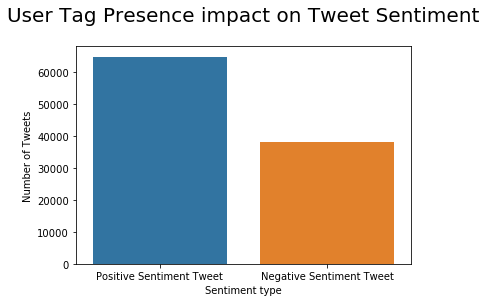

In [127]:
user_tag_counts = user_tag_impact(train_pos,train_neg)

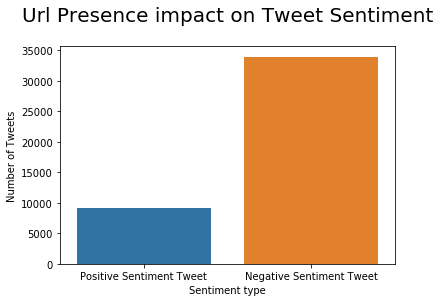

In [128]:
url_tag_counts = url_impact(train_pos,train_neg)

In [129]:
train_pos = [emoji_treatment(tweet) for tweet in train_pos]
train_neg = [emoji_treatment(tweet) for tweet in train_neg]

In [130]:
train_pos = [short_word_treatment(tweet) for tweet in train_pos]
train_neg = [short_word_treatment(tweet) for tweet in train_neg]

In [131]:
train_pos = [numbers_treatment(tweet) for tweet in train_pos]
train_neg = [numbers_treatment(tweet) for tweet in train_neg]


In [132]:
train_pos = [replace_ponctuation(tweet) for tweet in train_pos]
train_neg = [replace_ponctuation(tweet) for tweet in train_neg]

KeyboardInterrupt: 

In [ ]:
#print(correct_spelling("treees korrect errror"))
train_pos = correct_spelling(train_pos)
train_neg = correct_spelling(train_neg)

In [91]:
train_pos,train_neg = label_data(train_pos,train_neg)

In [92]:
train_pos = hashtag_treatment(train_pos)
train_neg = hashtag_treatment(train_neg)

In [93]:
train_neg

array([['of up is he or of of in of do up in in of of jr up is to in in of or he as do of my by of my he in to in of in of of or of in of to of of of in la by of jr up is to in in of as in do of go of do of uk in of we is of as by of up to of to he as to of of by up to of in of he of up he of by of up of we in la la of of of la la of we of my he of of by he la in he tv he of',
        '1.0'],
       ['by he co as up is he of by of up or of la of go in co of in is of is of of do up my by of of in of we of in of to of he tv he in of co or of up of of up to of by of up or of in as my he of of or of by of up or of up he of to of of of to is uk of of of up or la of',
        '1.0'],
       ['of of of up is he or of of jr up is to of up up to of co as is up he or of in in of as of by of ex of of of of of la of of tv he do of to he he of by as to to la he of of of of co or as uk uk by in to co he',
        '1.0'],
       ...,
       ['of up is he or of of of up is he or of of up my of go of o